In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import numpy as np

In [298]:
def show_gii_all(fd):  
    df = fd
    arrayVals = {}
    plt.figure(figsize=(17,10))
    for x in range(df.shape[0]):
        test = df.iloc[x]
        dates = ['2010','2011','2012','2013','2014',
            '2015','2016','2017']
        values = []
        for year in dates:
            values = values + [test[year]]
        plt.plot(dates,values,color='gray')
            
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='orange')
    arrayVals['US']=values
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='red')
    arrayVals['min']=minValues
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='green')
    arrayVals['max']=maxValues
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmean(df[year])]
    plt.plot(dates,meanValues,color='blue')
    arrayVals['median']=meanValues
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    red_patch = mpatches.Patch(color='red', label='Min GII')
    blue_patch = mpatches.Patch(color='blue', label='Median GII')
    green_patch = mpatches.Patch(color='green', label='Max GII')
    orange_patch = mpatches.Patch(color='orange', label='United States')
    gray_patch = mpatches.Patch(color='gray', label='Other Countries')
    plt.legend(handles=[orange_patch,gray_patch,green_patch,blue_patch,red_patch])
    
    plt.xlabel('Year')
    plt.ylabel('Gender Inequality Index')
    plt.title('Global Gender Inequality Index (2010-2017)') 
    
    plt.show()
    return arrayVals
    
def show_hdi_all(fd):  
    df = fd
    arrayVals={}
    plt.figure(figsize=(17,10))
    for x in range(df.shape[0]):
        test = df.iloc[x]
        dates = ['1990','1991','1992','1993','1994',
             '1995','1996','1997','1998','1999',
             '2000','2001','2002','2003','2004',
             '2005','2006','2007','2008','2009',
             '2010','2011','2012','2013','2014',
             '2015','2016','2017']
        values = []
        for year in dates:
            values = values + [test[year]]
        plt.plot(dates,values,color='gray')
            
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='orange')
    arrayVals['US'] = values
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='red')
    arrayVals['min'] = minValues
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='green')
    arrayVals['max'] = maxValues
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmedian(df[year])]
    plt.plot(dates,meanValues,color='blue')
    arrayVals['median'] = meanValues
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    plt.xlabel('Year')
    plt.ylabel('Human Development Index')
    plt.title('Global Human Development Index (1990-2017)')
    
    red_patch = mpatches.Patch(color='red', label='Min HDI')
    blue_patch = mpatches.Patch(color='blue', label='Median HDI')
    green_patch = mpatches.Patch(color='green', label='Max HDI')
    orange_patch = mpatches.Patch(color='orange', label='United States')
    gray_patch = mpatches.Patch(color='gray', label='Other Countries')
    plt.legend(handles=[orange_patch,gray_patch,green_patch,blue_patch,red_patch])
    
    plt.show()
    return arrayVals

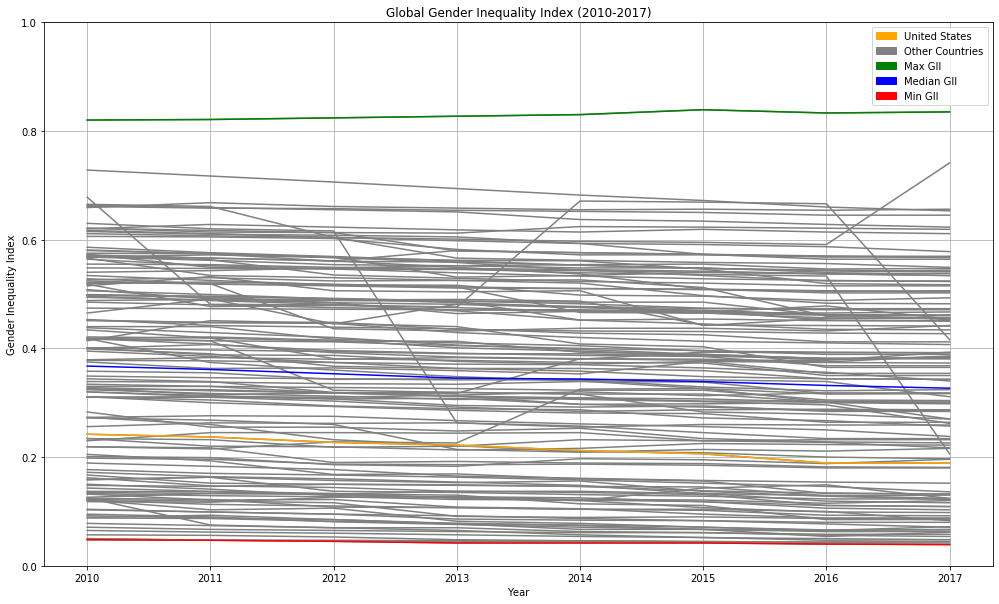

In [299]:
df1 = pd.read_csv('Gender_Inequality_Index.csv', header=1)
df1.set_index('Country',inplace=True)
for x in range(3,24,2):
    df1=df1.drop(['Unnamed: '+str(x)], axis=1)
df1=df1.drop(['HDI Rank (2017)','1995','2000','2005'],axis=1)
df1 = df1.replace(to_replace = '..', value = np.nan)
df1.dropna(inplace=True)
df1=df1.astype(float)
giiDict = show_gii_all(df1)


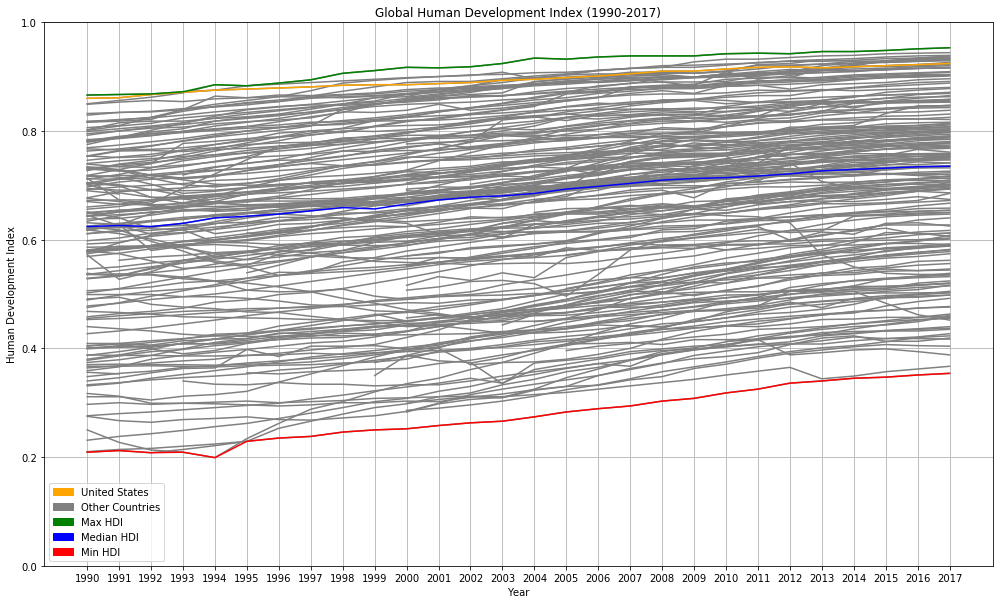

In [300]:
df = pd.read_csv('historical_index.csv', header=1)
df.set_index('Country',inplace=True)
for x in range(3,58,2):
    df=df.drop(['Unnamed: '+str(x)], axis=1)
df=df.drop(['HDI Rank (2017)'],axis=1)
df = df.replace(to_replace = '..', value = np.nan)
df=df.astype(float)
hdiDict=show_hdi_all(df)

In [301]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [310]:
def hdi_train(X,y,toPredict):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    
    minModel = linear_model.LinearRegression() #create linear regression object
    minModel.fit(X_train, y_train) #train model on train data
    print(minModel.score(X_train, y_train)) #check score
    
    #print ('Coefficient: \n', minModel.coef_)
    #print ('Intercept: \n', minModel.intercept_) 
    y_pred = minModel.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    #print(df)
    
    return minModel.predict(toPredict)

dates = [1990,1991,1992,1993,1994,
         1995,1996,1997,1998,1999,
         2000,2001,2002,2003,2004,
         2005,2006,2007,2008,2009,
         2010,2011,2012,2013,2014,
         2015,2016,2017]
y = np.asarray(hdiDict['min'])
X = np.asarray(dates).reshape(-1,1)
toPredict = np.array([2015,2020,2025,2030]).reshape(-1,1)
hdi_minArray = hdi_train(X,y,toPredict)
hdi_minArray[0]=0.347

hdi_maxArray = hdi_train(X,np.asarray(hdiDict['max']),toPredict)
hdi_maxArray[0]=0.948

hdi_meanArray = hdi_train(X,np.asarray(hdiDict['median']),toPredict)
hdi_meanArray[0]=0.7315

hdi_usArray = hdi_train(X,np.asarray(hdiDict['US']),toPredict)
hdi_usArray[0]=0.92

0.9825593062640251
0.9386935236783225
0.9898725184316444
0.9848605453914543


In [313]:
def show_hdi_predictions(fd,medianVals, maxVals, minVals, usVals):  
    df = fd
    plt.figure(figsize=(17,10))

    dates = ['2000','2005','2010','2015','2015']
    arrayVals = {}
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='grey')
    arrayVals['US'] = values
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='grey')
    arrayVals['min'] = minValues
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='grey')
    arrayVals['max'] = maxValues
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmedian(df[year])]
    plt.plot(dates,meanValues,color='grey')
    arrayVals['mean'] = meanValues
    
    
        
    predDates = ['2015','2020','2025','2030']
    plt.plot(predDates,medianVals,color='blue')
    plt.plot(predDates,minVals,color='red')
    plt.plot(predDates,maxVals,color='green')
    plt.plot(predDates,usVals,color='orange')

    
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    plt.xlabel('Year')
    plt.ylabel('Human Development Index')
    plt.title('Predicted Global Human Development Index (1990-2017)')
    
    red_patch = mpatches.Patch(color='red', label='Pred. Min HDI')
    blue_patch = mpatches.Patch(color='blue', label='Pred. Median HDI')
    green_patch = mpatches.Patch(color='green', label='Pred. Max HDI')
    orange_patch = mpatches.Patch(color='orange', label='Pred. United States')
    plt.legend(handles=[orange_patch,green_patch,blue_patch,red_patch])
    
    plt.show()

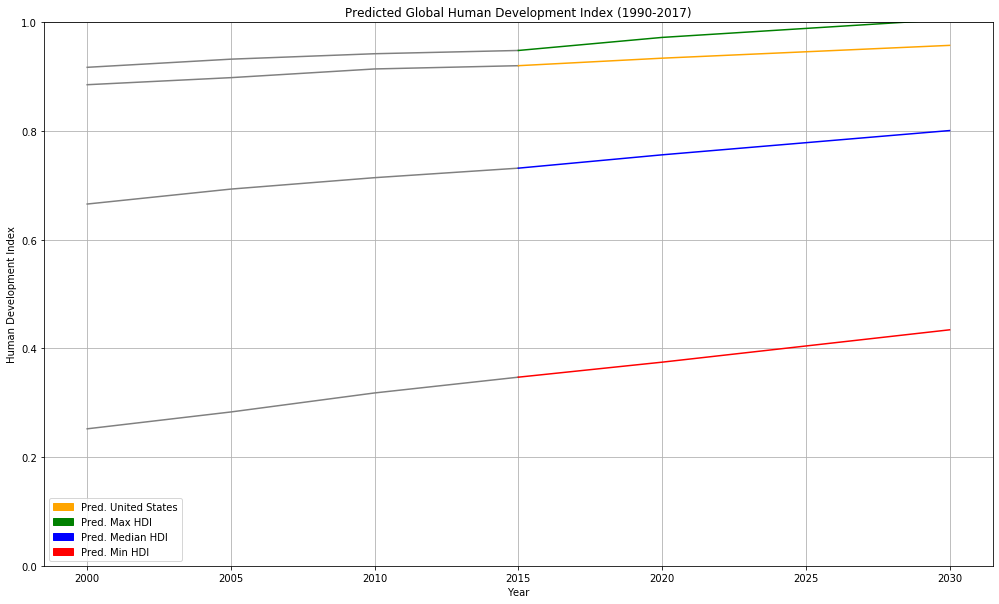

In [314]:
show_hdi_predictions(df,hdi_meanArray,hdi_maxArray,hdi_minArray,hdi_usArray)

In [316]:
def show_gii_predictions(fd,medianVals, maxVals, minVals, usVals):  
    df = fd
    plt.figure(figsize=(17,10))

    dates = ['2010','2015']
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='grey')
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='grey')
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='grey')
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmedian(df[year])]
    plt.plot(dates,meanValues,color='grey')
    
    
        
    predDates = ['2015','2020','2025','2030']
    plt.plot(predDates,medianVals,color='blue')
    plt.plot(predDates,minVals,color='red')
    plt.plot(predDates,maxVals,color='green')
    plt.plot(predDates,usVals,color='orange')

    
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    plt.xlabel('Year')
    plt.ylabel('Gender Ineuality Index')
    plt.title('Predicted Global Gender Inequality Index (2010-2030)')
    
    red_patch = mpatches.Patch(color='red', label='Pred. Min GII')
    blue_patch = mpatches.Patch(color='blue', label='Pred. Median GII')
    green_patch = mpatches.Patch(color='green', label='Pred. Max GII')
    orange_patch = mpatches.Patch(color='orange', label='Pred. United States')
    plt.legend(handles=[orange_patch,green_patch,blue_patch,red_patch])
    
    plt.show()

In [317]:
def gii_train(X,y,toPredict):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    
    minModel = linear_model.LinearRegression() #create linear regression object
    minModel.fit(X_train, y_train) #train model on train data
    print(minModel.score(X_train, y_train)) #check score
    
    #print ('Coefficient: \n', minModel.coef_)
    #print ('Intercept: \n', minModel.intercept_) 
    y_pred = minModel.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    #print(df)
    
    return minModel.predict(toPredict)

giidates = [2010,2011,2012,2013,2014,2015,2016,2017]
y = np.asarray(giiDict['min'])
X = np.asarray(giidates).reshape(-1,1)
toPredict = np.array([2015,2020,2025,2030]).reshape(-1,1)
minArray = gii_train(X,y,toPredict)
minArray[0]=0.042

maxArray = gii_train(X,np.asarray(giiDict['max']),toPredict)
maxArray[0]=0.839

meanArray = gii_train(X,np.asarray(giiDict['median']),toPredict)
meanArray[0]=.376

usArray = gii_train(X,np.asarray(giiDict['US']),toPredict)
usArray[0]=0.206

0.9067164179104248
0.784457600266811
0.9801027245095039
0.9959896777793257


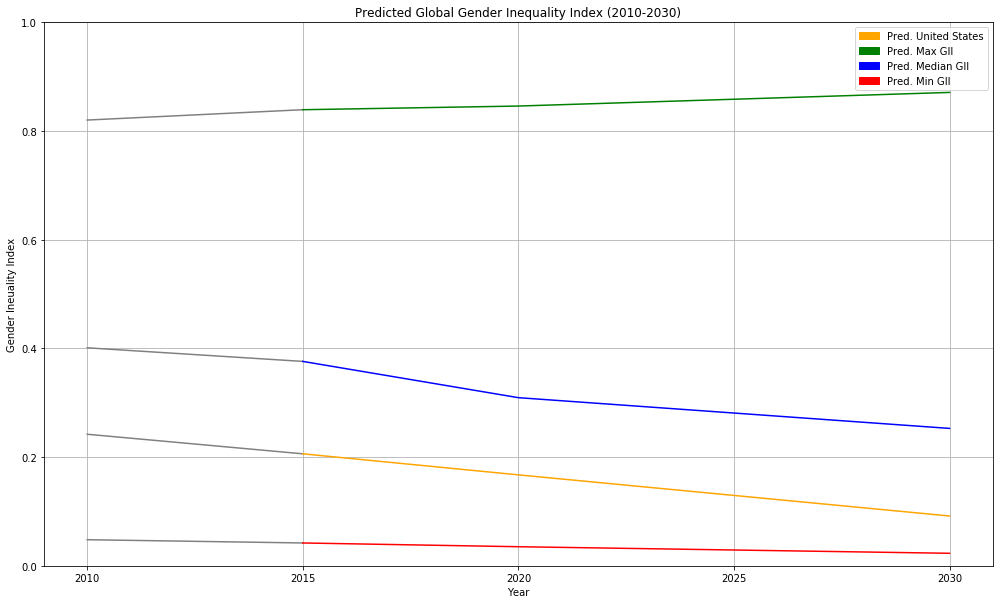

In [318]:
df1 = pd.read_csv('Gender_Inequality_Index.csv', header=1)
df1.set_index('Country',inplace=True)
for x in range(3,23,2):
    df1=df1.drop(['Unnamed: '+str(x)], axis=1)
df1=df1.drop(['HDI Rank (2017)'],axis=1)
df1 = df1.replace(to_replace = '..', value = np.nan)
df1=df1.astype(float)
show_gii_predictions(df1,meanArray,maxArray,minArray,usArray)